In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("amz_uk_price_prediction_dataset.csv")



In [6]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [19]:
proportion_table = df['category'].value_counts(normalize=True)

proportion_table

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
                                            ...   
Alexa Built-In Devices                    0.000044
Motorbike Chassis                         0.000044
Plugs                                     0.000044
Smart Home Security & Lighting            0.000043
Smart Speakers                            0.000022
Name: proportion, Length: 296, dtype: float64

In [20]:
amout_table = pd.crosstab(index = df["category"], 
                              columns="count").sort_values(by = ["count"], ascending= False)
amout_table.head(5)

col_0,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


In [38]:
amout_table.index.unique()

Index(['Sports & Outdoors', 'Beauty', 'Handmade Clothing, Shoes & Accessories',
       'Bath & Body', 'Birthday Gifts', 'Manicure & Pedicure Products',
       'Skin Care', 'Make-up', 'Hair Care', 'Fragrances',
       ...
       'Cameras', 'Lights and switches', 'Material Handling Products',
       'Boating Footwear', 'Lighting', 'Motorbike Chassis', 'Plugs',
       'Alexa Built-In Devices', 'Smart Home Security & Lighting',
       'Smart Speakers'],
      dtype='object', name='category', length=296)

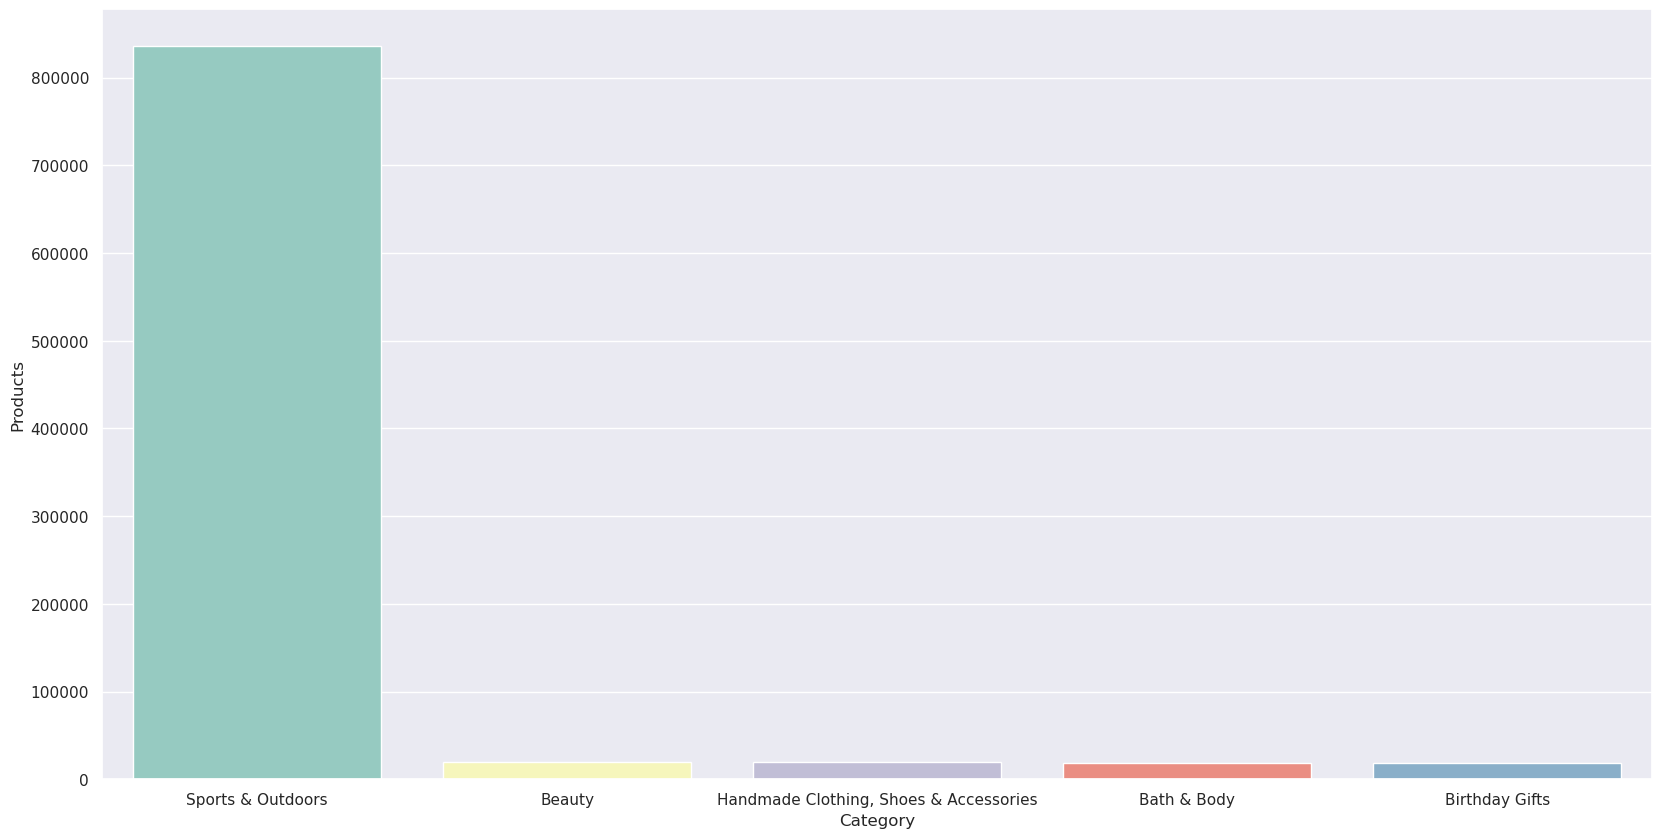

In [64]:
# too much categories, using top 5

sns.set(rc={"figure.figsize":(20, 10)}) 
amout_table = amout_table.head(5)
fig, axes = plt.subplots()
sns.barplot(x=amout_table.index, y= amout_table["count"], palette="Set3",hue=amout_table.index)
axes.set_ylabel("Products")
axes.set_xlabel("Category")
plt.show()

In [ ]:
data = [15, 25, 25, 30, 5]
labels

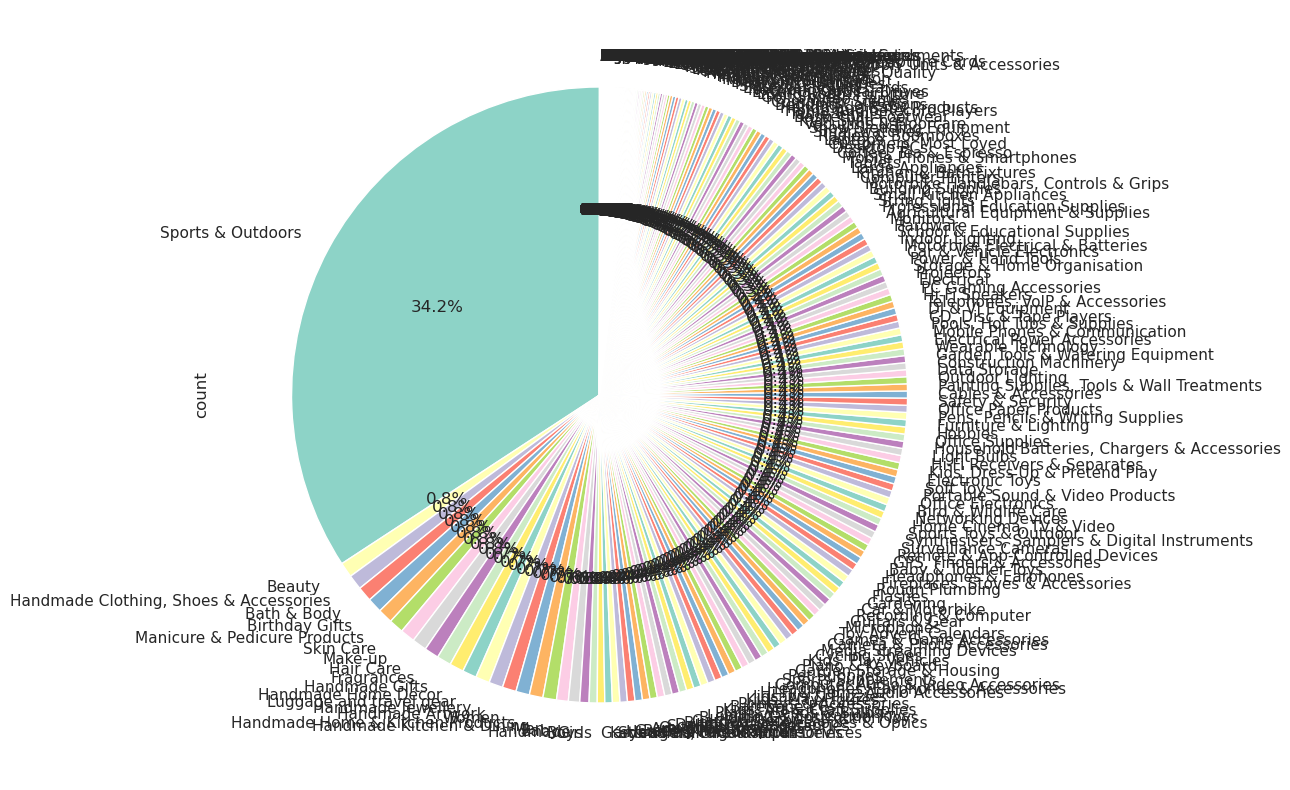

In [72]:
df['category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"));





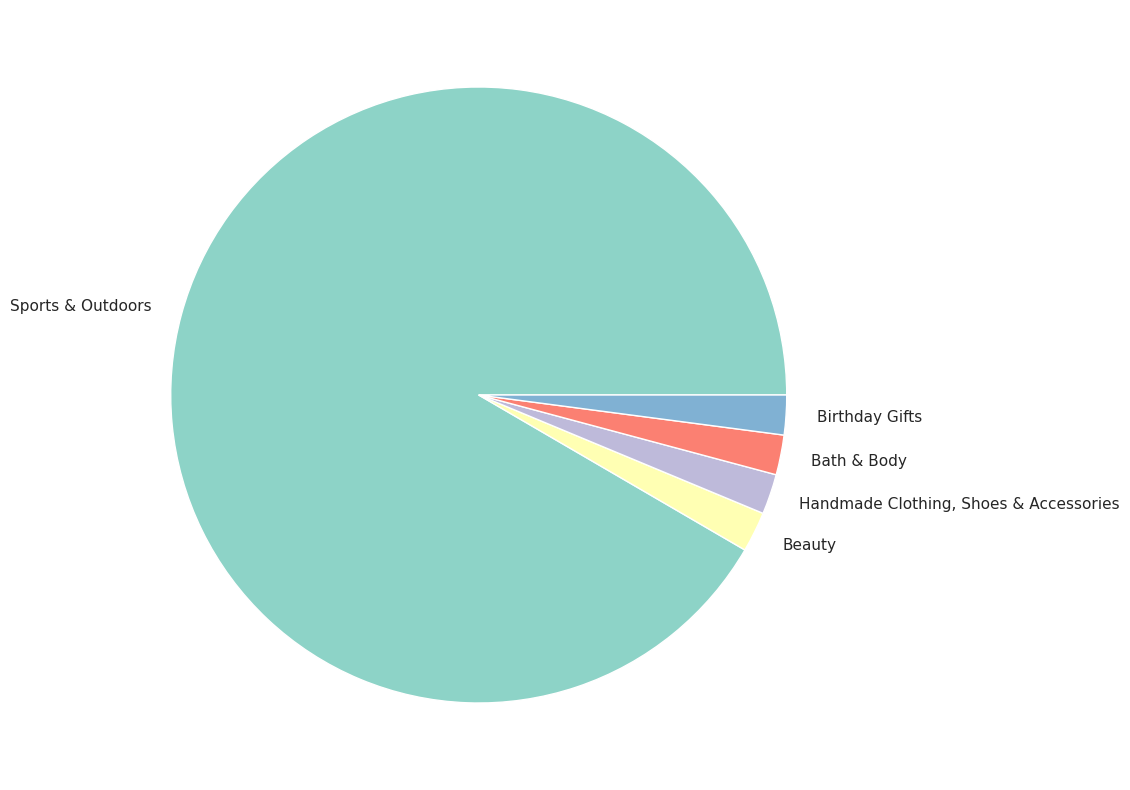

In [80]:
plt.pie(amout_table["count"], labels=amout_table.index, colors=sns.color_palette("Set3"));


Index(['Sports & Outdoors', 'Beauty', 'Handmade Clothing, Shoes & Accessories',
       'Bath & Body', 'Birthday Gifts'],
      dtype='object', name='category')

In [94]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

In [92]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price


(119445.48532256528,
 345.60886175352226,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

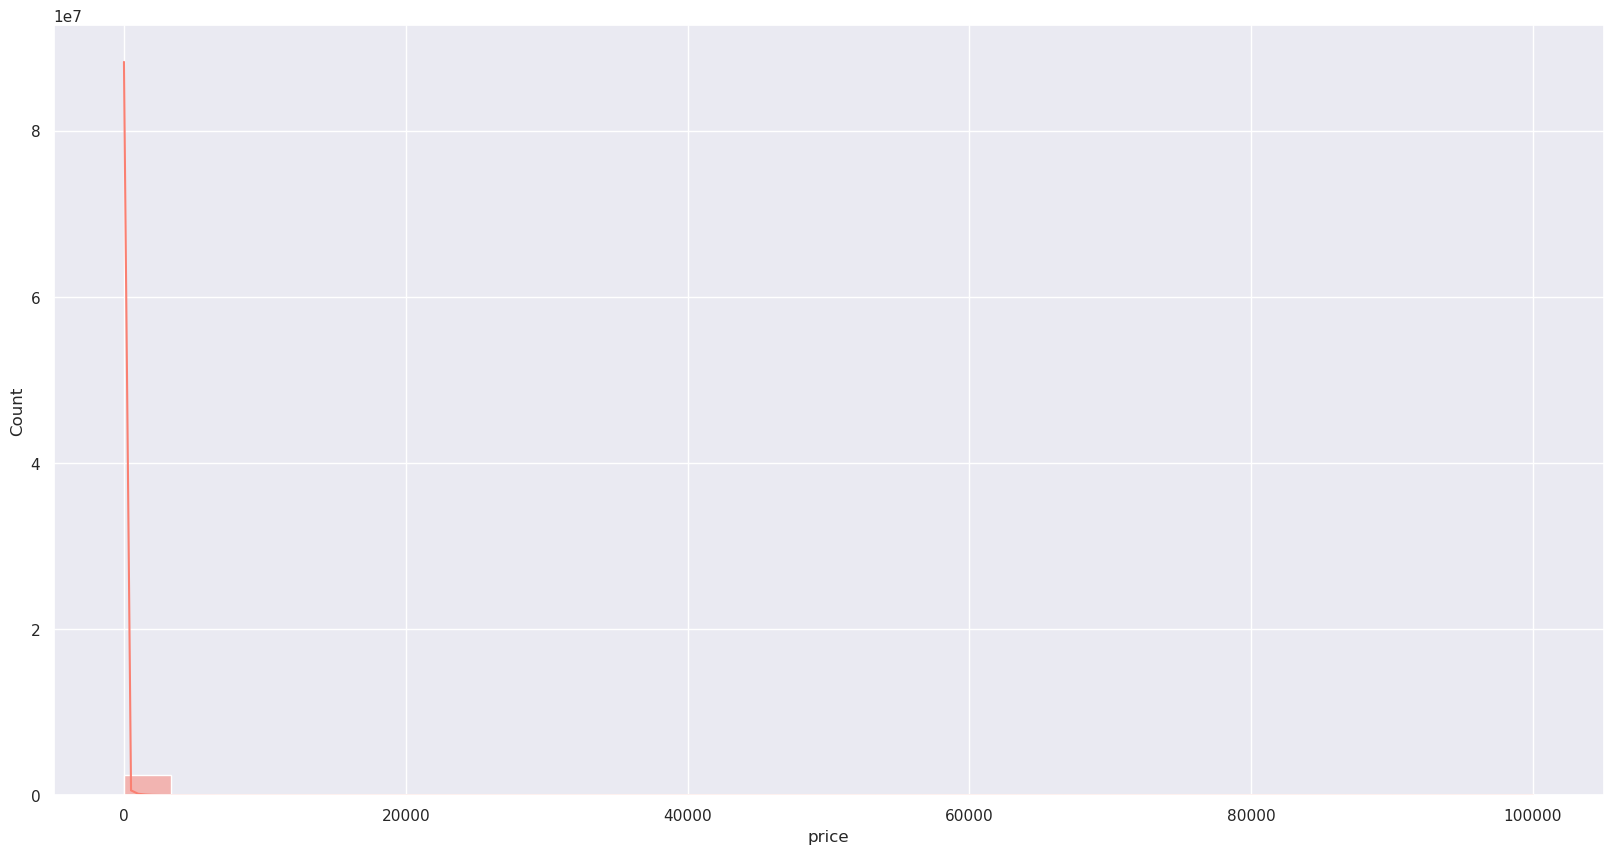

In [95]:
sns.histplot(df['price'], kde=True, bins=30, color="salmon");

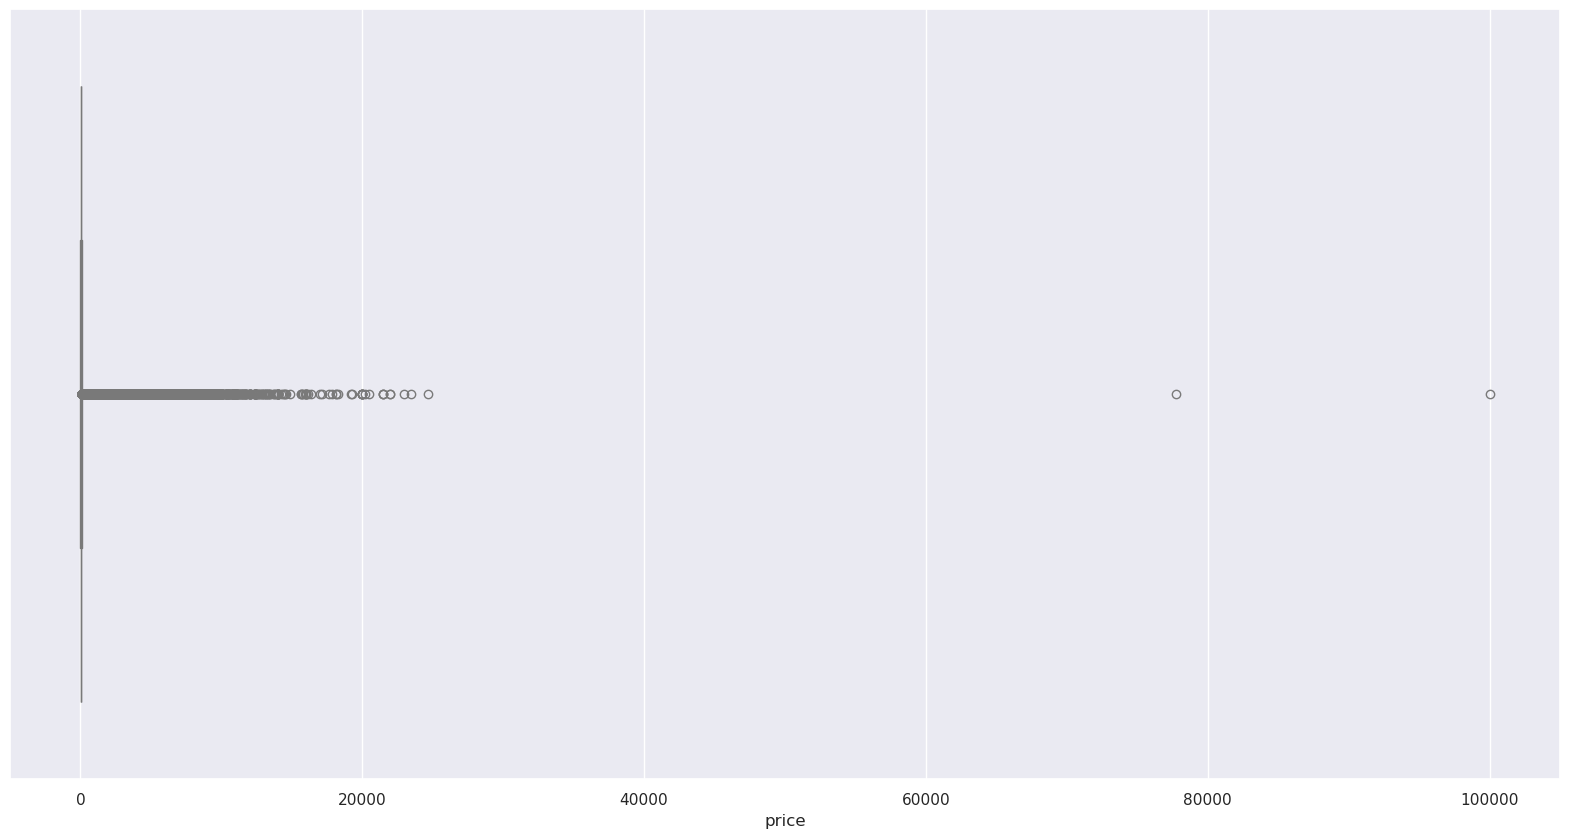

In [96]:
sns.boxplot(x = df['price'], color="lightblue");

In [98]:
mean_stars = df['stars'].mean()
median_stars = df['stars'].median()
mode_stars = df['stars'].mode()[0]

mean_stars, median_stars, mode_stars

(2.152836472966065, 0.0, 0.0)

In [100]:
variance_stars = df['stars'].var()
std_dev_stars = df['stars'].std()
min_stars = df['stars'].min()
max_stars = df['stars'].max()
range_stars = max_stars - min_stars
quantiles_stars = df['stars'].quantile([0.25, 0.5, 0.75])

variance_stars, std_dev_stars, min_stars, max_stars, range_stars, quantiles_stars


(4.81743402976196,
 2.1948653785054697,
 0.0,
 5.0,
 5.0,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

In [101]:
skewness_stars = df['stars'].skew()
kurtosis_stars = df['stars'].kurtosis()

skewness_stars, kurtosis_stars

(0.08120735761080985, -1.9260061280432985)

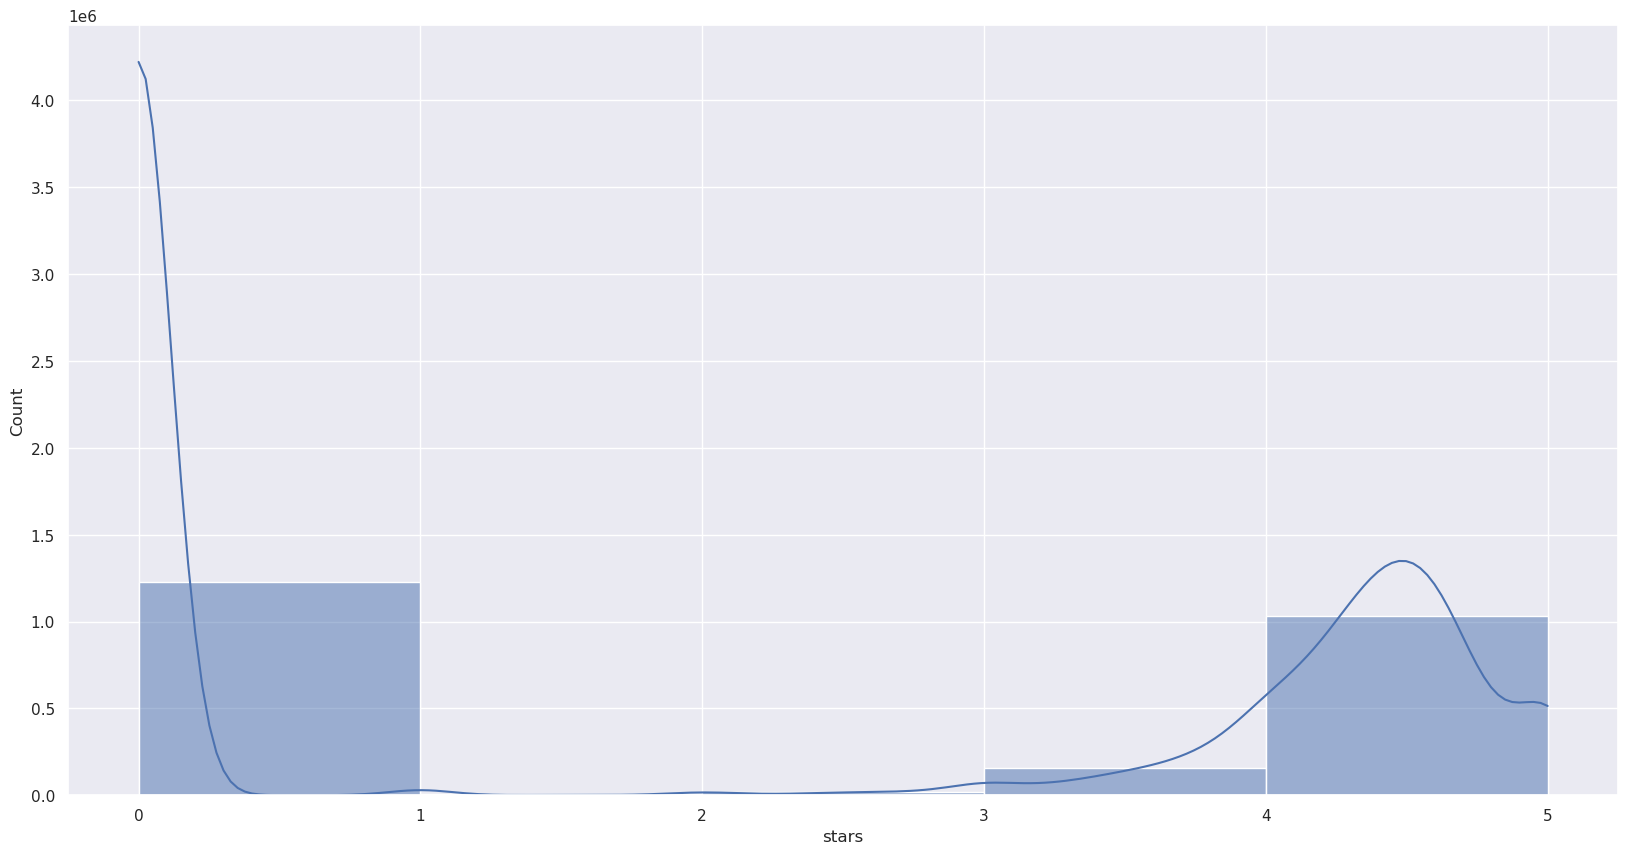

In [102]:
sns.histplot(df['stars'], kde=True, bins=5);